In [1]:
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url="https://www.airlinequality.com/airline-reviews/british-airways"
response=requests.get(url)
response.status_code

200

In [3]:
soup=BeautifulSoup(response.text,'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <!-- icons & favicons -->
  <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-i

## Scraping all pages

In [4]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=300
reviews=[]

for i in range(1,pages+1):
    url=base_url+"/page/"+str(i)
    response = requests.get(url)
    data=response.text
    soup=BeautifulSoup(data,'html5lib')
    h2_elements = soup.find_all('h2', class_="text_header")
    h2_texts = [h2.text for h2 in h2_elements]
    reviews.extend(h2_texts)


In [5]:
reviews

['“Staff look tired and overworked”',
 '“I couldn’t fault them”',
 '“incompetence in customer service”',
 "“The most ridiculous thing I've heard”",
 '"one of the most disgusting onboard meals"',
 '“Does BA pay experts to design these breakfasts”',
 '"business class seats were abysmal"',
 '"Worst service/airline ever"',
 '“Much better experience this time around”',
 '“our compensation rights"',
 '"A380\'s are showing their age"',
 '"Service was fantastic" ',
 '"it was a very nice flight" ',
 '"onboard service was efficient"',
 '“Lots of stress”',
 '"did not offer a wheelchair"',
 '“Seat was fine but product ageing”',
 '"such a terrible customer experience" ',
 '"I was pleasantly surprised"',
 '"Buckle up, folks; this one\'s a rollercoaster"',
 '"cabin crew excellent"',
 '"Service level far worse then Ryanair"',
 '"do not upgrade members based on status"',
 '"Flight was smooth and quick"',
 '"Absolutely hopeless airline"',
 '"Customer Service is non existent"',
 '"I can’t imagine a worst

In [6]:
Set_={'Customer Review':reviews}
BA_reviews=pd.DataFrame(Set_)
BA_reviews

,Customer Review
0,“Staff look tired and overworked”
1,“I couldn’t fault them”
2,“incompetence in customer service”
3,“The most ridiculous thing I've heard”
4,"""one of the most disgusting onboard meals"""
...,...
2995,British Airways customer review
2996,British Airways customer review
2997,British Airways customer review
2998,British Airways customer review


In [7]:
BA_reviews["Customer Review"].value_counts()

Customer Review
British Airways customer review      234
"never fly British Airways again"      6
"Overall a good flight"                5
"I was pleasantly surprised"           4
"worst customer service"               3
                                    ... 
"Perfect welcome"                      1
"appears it was a window"              1
"worst business class trip"            1
"no longer getting compensated"        1
"cannot fault the service"             1
Name: count, Length: 2703, dtype: int64

In [8]:
value_to_del= 'British Airways customer review'
df = BA_reviews[BA_reviews['Customer Review'] != value_to_del]
df

,Customer Review
0,“Staff look tired and overworked”
1,“I couldn’t fault them”
2,“incompetence in customer service”
3,“The most ridiculous thing I've heard”
4,"""one of the most disgusting onboard meals"""
...,...
2774,"""need to up their game"""
2775,"""our last flight with British Airways"""
2776,"""supposed legacy airline"""
2777,"""staff amiable and present"""


# NLP

In [9]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['Customer Review'].apply(clean)
df

C:\Users\varun\AppData\Local\Temp\ipykernel_25344\2042354607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Reviews'] = df['Customer Review'].apply(clean)


,Customer Review,Cleaned Reviews
0,“Staff look tired and overworked”,Staff look tired and overworked
1,“I couldn’t fault them”,I couldn t fault them
2,“incompetence in customer service”,incompetence in customer service
3,“The most ridiculous thing I've heard”,The most ridiculous thing I ve heard
4,"""one of the most disgusting onboard meals""",one of the most disgusting onboard meals
...,...,...
2774,"""need to up their game""",need to up their game
2775,"""our last flight with British Airways""",our last flight with British Airways
2776,"""supposed legacy airline""",supposed legacy airline
2777,"""staff amiable and present""",staff amiable and present


In [10]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\varun\AppData\Local\Temp\ipykernel_25344\3663659467.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)


,Customer Review,Cleaned Reviews,POS tagged
0,“Staff look tired and overworked”,Staff look tired and overworked,"[(Staff, n), (look, n), (tired, v), (overworke..."
1,“I couldn’t fault them”,I couldn t fault them,"[(fault, n)]"
2,“incompetence in customer service”,incompetence in customer service,"[(incompetence, n), (customer, n), (service, n)]"
3,“The most ridiculous thing I've heard”,The most ridiculous thing I ve heard,"[(ridiculous, a), (thing, n), (heard, r)]"
4,"""one of the most disgusting onboard meals""",one of the most disgusting onboard meals,"[(one, None), (disgusting, a), (onboard, n), (..."


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_25344\2767537322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemma'] = df['POS tagged'].apply(lemmatize)


,Customer Review,Cleaned Reviews,POS tagged,Lemma
0,“Staff look tired and overworked”,Staff look tired and overworked,"[(Staff, n), (look, n), (tired, v), (overworke...",Staff look tire overwork
1,“I couldn’t fault them”,I couldn t fault them,"[(fault, n)]",fault
2,“incompetence in customer service”,incompetence in customer service,"[(incompetence, n), (customer, n), (service, n)]",incompetence customer service
3,“The most ridiculous thing I've heard”,The most ridiculous thing I ve heard,"[(ridiculous, a), (thing, n), (heard, r)]",ridiculous thing heard
4,"""one of the most disgusting onboard meals""",one of the most disgusting onboard meals,"[(one, None), (disgusting, a), (onboard, n), (...",one disgusting onboard meal


## Analyze the Sentiment

In [13]:
!pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

C:\Users\varun\AppData\Local\Temp\ipykernel_25344\123343064.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
C:\Users\varun\AppData\Local\Temp\ipykernel_25344\123343064.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Sentiment'].apply(vader_analysis)


,Customer Review,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,“Staff look tired and overworked”,Staff look tired and overworked,"[(Staff, n), (look, n), (tired, v), (overworke...",Staff look tire overwork,0.0000,Neutral
1,“I couldn’t fault them”,I couldn t fault them,"[(fault, n)]",fault,-0.4019,Negative
2,“incompetence in customer service”,incompetence in customer service,"[(incompetence, n), (customer, n), (service, n)]",incompetence customer service,-0.5106,Negative
3,“The most ridiculous thing I've heard”,The most ridiculous thing I ve heard,"[(ridiculous, a), (thing, n), (heard, r)]",ridiculous thing heard,-0.3612,Negative
4,"""one of the most disgusting onboard meals""",one of the most disgusting onboard meals,"[(one, None), (disgusting, a), (onboard, n), (...",one disgusting onboard meal,-0.5267,Negative
...,...,...,...,...,...,...
2774,"""need to up their game""",need to up their game,"[(need, n), (game, n)]",need game,0.0000,Neutral
2775,"""our last flight with British Airways""",our last flight with British Airways,"[(last, a), (flight, n), (British, a), (Airway...",last flight British Airways,0.0000,Neutral
2776,"""supposed legacy airline""",supposed legacy airline,"[(supposed, v), (legacy, n), (airline, n)]",suppose legacy airline,0.0000,Neutral
2777,"""staff amiable and present""",staff amiable and present,"[(staff, n), (amiable, a), (present, a)]",staff amiable present,0.0000,Neutral


In [15]:
df["Analysis"].value_counts()

Analysis
Neutral     1586
Negative     808
Positive     372
Name: count, dtype: int64

<Axes: xlabel='Analysis', ylabel='count'>

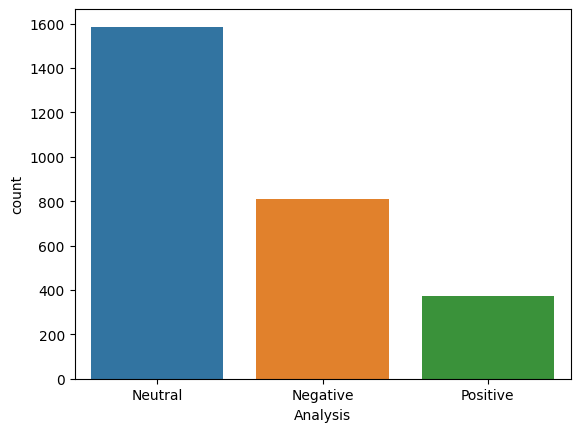

In [16]:
import seaborn as sns
sns.barplot(x=df["Analysis"].value_counts().index, y=df["Analysis"].value_counts())